In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<b>Load the flowers dataset

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar = True)

228813984/228813984 [==============================] - 13s 0us/step


In [8]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [10]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [13]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

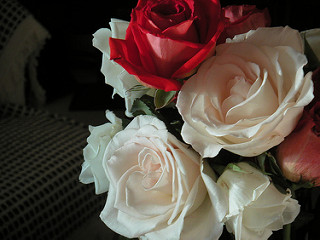

In [17]:
PIL.Image.open(str(roses[1]))

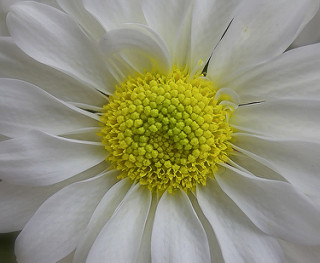

In [19]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

<b> Read flowers image from disk into numpy using opencv

In [20]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tupils': list(data_dir.glob('tupile/*')),
}

In [21]:
flowers_label_dir = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tupils':4
}

In [25]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [26]:
img  = cv2.imread(str(flowers_image_dict['roses'][0]))

In [28]:
img.shape

(240, 179, 3)

In [39]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (100, 100))
        X.append(resized_img)
        y.append(flowers_label_dir[flower_name])

In [40]:
X = np.array(X)
y = np.array(y)

<b> Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<B> Preprocessing: scale images

In [42]:
X_train_scaled = X_train / 255
X_test_scaled = X_test/255

<b> Build CNN and train it

In [43]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 




Epoch 1/30


68/68 [==============================] - 3s 35ms/step - loss: 1.0926 - accuracy: 0.5151
Epoch 2/30
68/68 [==============================] - 2s 33ms/step - loss: 0.8229 - accuracy: 0.6679
Epoch 3/30
68/68 [==============================] - 2s 35ms/step - loss: 0.7067 - accuracy: 0.7269
Epoch 4/30
68/68 [==============================] - 2s 33ms/step - loss: 0.6062 - accuracy: 0.7701
Epoch 5/30
68/68 [==============================] - 2s 33ms/step - loss: 0.4959 - accuracy: 0.8105
Epoch 6/30
68/68 [==============================] - 2s 33ms/step - loss: 0.3886 - accuracy: 0.8593
Epoch 7/30
68/68 [==============================] - 2s 33ms/step - loss: 0.2986 - accuracy: 0.8946
Epoch 8/30
68/68 [==============================] - 2s 33ms/step - loss: 0.2650 - accuracy: 0.9080
Epoch 9/30
68/68 [==============================] - 2s 33ms/step - loss: 0.1630 - accuracy: 0.9466
Epoch 10/30
68/68 [==============================] - 2s 36ms/step - loss: 0.1265 - accuracy: 0.9591
Epoc

In [57]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 10ms/step - loss: 445.6140 - accuracy: 0.6100


[445.6139831542969, 0.6100278496742249]

<B>Here we see that while train accuracy is very high (100%), the test accuracy is significantly low (61%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [46]:
predicions = model.predict(X_test_scaled)
predicions

23/23 [==============================] - 0s 9ms/step


array([[ 18.919546  ,  26.001926  ,  -0.6514201 ,  -6.730929  ,
        -34.39019   ],
       [ -3.9079285 ,  16.024542  ,   2.8648622 ,   8.936751  ,
        -25.217901  ],
       [ 24.996363  ,   7.4989576 ,  -7.337501  ,   0.9682663 ,
        -35.72292   ],
       ...,
       [ -1.7922045 ,  -1.3565801 ,  15.907068  ,  -5.701297  ,
        -20.150854  ],
       [  7.770172  ,   4.6082573 ,   0.25950077,  -2.124915  ,
        -14.023615  ],
       [ 15.760777  ,  14.572758  ,   3.3437855 ,  -2.5347178 ,
        -41.398434  ]], dtype=float32)

In [49]:
score = tf.nn.softmax(predicions[0])
np.argmax(score)


1

In [50]:
y_test[0]

1

<b>Improve Test Accuracy Using Data Augmentation

In [52]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(100, 
                                                              100,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

<B>Train the model using data augmentation and a drop out layer


In [53]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
68/68 [==============================] - 4s 44ms/step - loss: 1.1490 - accuracy: 0.5039
Epoch 2/30
68/68 [==============================] - 3s 42ms/step - loss: 0.8644 - accuracy: 0.6568
Epoch 3/30
68/68 [==============================] - 3s 43ms/step - loss: 0.7732 - accuracy: 0.7037
Epoch 4/30
68/68 [==============================] - 3s 44ms/step - loss: 0.7161 - accuracy: 0.7227
Epoch 5/30
68/68 [==============================] - 3s 43ms/step - loss: 0.6767 - accuracy: 0.7436
Epoch 6/30
68/68 [==============================] - 3s 42ms/step - loss: 0.6281 - accuracy: 0.7627
Epoch 7/30
68/68 [==============================] - 3s 42ms/step - loss: 0.5909 - accuracy: 0.7747
Epoch 8/30
68/68 [==============================] - 3s 41ms/step - loss: 0.5648 - accuracy: 0.7845
Epoch 9/30
68/68 [==============================] - 3s 42ms/step - loss: 0.5639 - accuracy: 0.7845
Epoch 10/30
68/68 [==============================] - 3s 41ms/step - loss: 0.5213 - accuracy: 0.8012
Epoch 11/

In [55]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 0s 10ms/step - loss: 0.5778 - accuracy: 0.8036


[0.5778381824493408, 0.8036211729049683]